<a href="https://colab.research.google.com/github/teazaw/MAT421-Applied-Computational-Methods/blob/main/MAT421_HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.1 Introduction to Linear Algebra**
**Linear algebra** is a field of mathematics that is widely used in various disciplines, such as data science and machine learning. The following sections discuss concepts such as vector spaces, orthogonality, eigenvalues, matrix decomposition, linear regression, principal component analysis, and more. Thus, linear algebra provides essential tools for solving data science problems.


# **1.2 Elements of Linear Algebra**
**1.2.1 Linear Spaces**

A **linear space**, also called a vector space, is a mathematical structure consisting of a set of vector along with operations of additions and scalar multiplication that satisfy specific properties.

A linear subspace of V is a subset  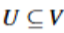 that is closed under vector addition and scalar multiplication.

A span of a set of vectors in a linear subspace.




**1.2.2 Orthogonality**
In many applications, the use of orthonormal bases can simplify mathematical representations. There are several important definitions in orthogonality.
1. **Orthonormal bases**- An orthonormal basis is a set of vectors that are mutually orthogonal and have unit norm. The inner product is given by: 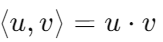. The norm is given by: 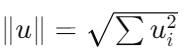


The following example demonstrates the process of checking whether two vectors are orthogonal.

In [8]:
import numpy as np

a = np.array([1, 2, 3])
b = np.array([3, -2, 1])


dot_product = np.dot(a, b)


if dot_product == 0:
    print("The vectors are orthogonal.")
else:
    print(f"The vectors are not orthogonal. Dot product = {dot_product}")


The vectors are not orthogonal. Dot product = 2


2. **Best Approximation Theorem**: This states that if we have a vector *v* and a linear subspace *U*, the closest vector to *v* in *U* is given by its orthogonal projection unto *U*. A visualization of the best approximation theorem can be given by:
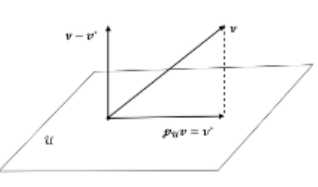

3. **Orthogonal decomposition**: This is a way to break a vector into two perpendicular (orthogonal) components: one part that lies in a subspace *U* and one part that is orthogonal (perpendicular) to *U*.
4. **The Gram-Schmidt process**: This converts a set of linearly independent vectors into an orthonormal basis for the same subspace. Basically, we add the vectors one by one but only after taking out their orthogonal projection onto the previously included vectors.
4. **Eigenvalues and Eigenvectors**: For a square matrix *A*, an eigenvalue λ and an eignevector *x* satisfy the condition: 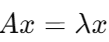

Eigenvectors correspond to different eigenvalues that are linearly independent. Symmetric matrices always have real eigenvalues and are diagonalizable.

The following example demonstrates the Gram-Schmidt process.

In [16]:
import numpy as np


def gram_schmidt(vectors):
    orthogonal_vectors = []

    for v in vectors:
        u = v
        for w in orthogonal_vectors:
            projection = np.dot(u, w) / np.dot(w, w) * w
            u = u - projection

        if np.linalg.norm(u) > 1e-6:
            orthogonal_vectors.append(u)

    return orthogonal_vectors
v1 = np.array([1, 1, 1])
v2 = np.array([1, 0, -1])
v3 = np.array([0, 1, 2])


vectors = [v1, v2, v3]
orthogonal_vectors = gram_schmidt(vectors)
orthonormal_vectors = [v / np.linalg.norm(v) for v in orthogonal_vectors]


print("Original Vectors:")
print(f"v1 = {v1}")
print(f"v2 = {v2}")
print(f"v3 = {v3}\n")

print("Orthogonal Vectors:")
for i, v in enumerate(orthogonal_vectors):
    print(f"u{i+1} = {v}")

print("\nOrthonormal Vectors:")
for i, v in enumerate(orthonormal_vectors):
    print(f"q{i+1} = {v}")







Original Vectors:
v1 = [1 1 1]
v2 = [ 1  0 -1]
v3 = [0 1 2]

Orthogonal Vectors:
u1 = [1 1 1]
u2 = [ 1.  0. -1.]

Orthonormal Vectors:
q1 = [0.57735027 0.57735027 0.57735027]
q2 = [ 0.70710678  0.         -0.70710678]


# **1.3 Linear Regression**
**1.3.1 QR Decomposition**

**QR Decomposition** is used to solve the linear least squares problem. The process begins with the **Gram-Schmidt algorithm**, which transforms a linearly independent set of vectors into an orthonormal basis.

The Gram-Schmidt process results in the QR decomposition:

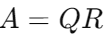

**1.3.2** **Least-squares Problems**

The least-squares problem can be represented as:

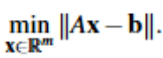

**Normal equations** are a way to approach the least-squares problem. Here, the solution to the least-squares problem satisfies

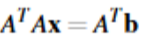

**QR decomposition** can also be used. Here, the solution to the least-squares problem satisfies

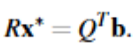

The following example demonstrates the process of solving a least-squares problem using QR decomposition.

Matrix Q (Orthogonal):
[[-0.16903085  0.89708523]
 [-0.50709255  0.27602622]
 [-0.84515425 -0.34503278]]

Matrix R (Upper Triangular):
[[-5.91607978 -7.43735744]
 [ 0.          0.82807867]]

Reconstructed Matrix A (Q * R):
[[1. 2.]
 [3. 4.]
 [5. 6.]]

Solution to the least-squares problem (x):
[1.50129554e-16 5.00000000e-01]


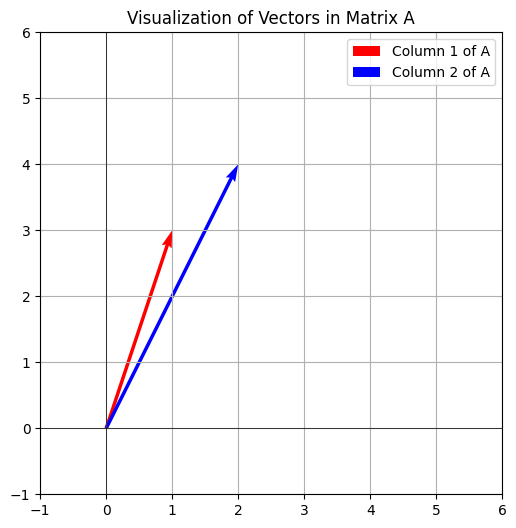

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# sample matrix
A = np.array([[1, 2], [3, 4], [5, 6]])

# qr decomposition
Q, R = np.linalg.qr(A)
print("Matrix Q (Orthogonal):")
print(Q)
print("\nMatrix R (Upper Triangular):")
print(R)

# reconstruct A and solve for b
A_reconstructed = np.dot(Q, R)
print("\nReconstructed Matrix A (Q * R):")
print(A_reconstructed)
b = np.array([1, 2, 3])

# Rx = Q^T * b
Q_T_b = np.dot(Q.T, b)
x = np.linalg.solve(R, Q_T_b)
print("\nSolution to the least-squares problem (x):")
print(x)

plt.figure(figsize=(6, 6))
plt.quiver(0, 0, A[0, 0], A[1, 0], angles='xy', scale_units='xy', scale=1, color='r', label="Column 1 of A")
plt.quiver(0, 0, A[0, 1], A[1, 1], angles='xy', scale_units='xy', scale=1, color='b', label="Column 2 of A")

plt.xlim(-1, 6)
plt.ylim(-1, 6)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.title('Visualization of Vectors in Matrix A')
plt.show()


**Linear regression** involves findings coefficients 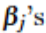 that minimize the criterion
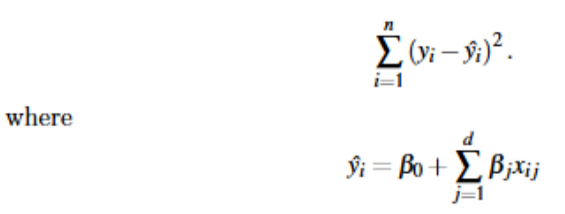

can be viewed as the prected values of the linear model with the new coefficients. Then the problem is transformed to
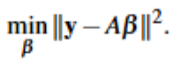

The following example demonstrates linear regression.

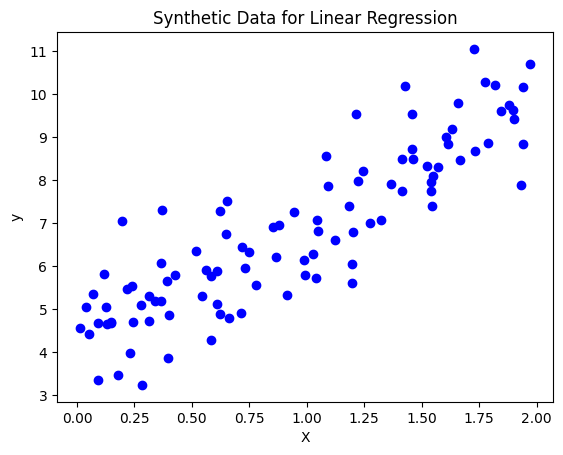

Intercept (β0): [4.21509616]
Coefficient (β1): [[2.77011339]]


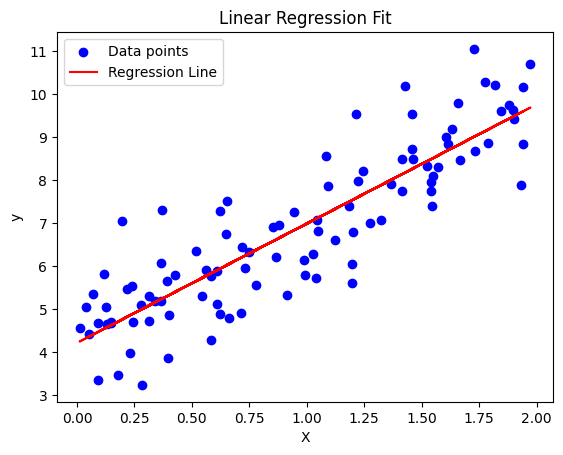

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# visualize
plt.scatter(X, y, color='blue', label='Data points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Synthetic Data for Linear Regression')
plt.show()

# create linear regression model
model = LinearRegression()
model.fit(X, y)


print(f"Intercept (β0): {model.intercept_}")
print(f"Coefficient (β1): {model.coef_}")

y_pred = model.predict(X)

# visualize
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()


# **1.4 Principal Component Analysis**
**Principal Component Analysis** is a statistical technique used for dimensionality reduction while preventign as much variance as possible in a dataset.

There are several key concepts of PCA:
1. **Covariance Matrix:** PCA begins by calculating the covariance matrix of the data.
2. **Eigenvalues and Eigenvectors:** The eigenvectors of the covariance matrix represent the directions of maximum variance in the data, and the eigenvalues indicate how much variance there is along each eignevector (principal component).
3. **Principal Components:** The eigenvectors are sorted by their corresponding eigenvalues in descending order.
4. **Dimensionality Reduction:** To reduce dimensionality, we can select the top *k* principal components (those with the highest eigenvalues) and project the data onto them, which reduces the number of features while retaining the most significant variance in the dataset.

Thus, PCA helps to simplify complex datasets by identifying the key directions in which the data varies the most and projecting the data into these directions. The following example demonstrates PCA.

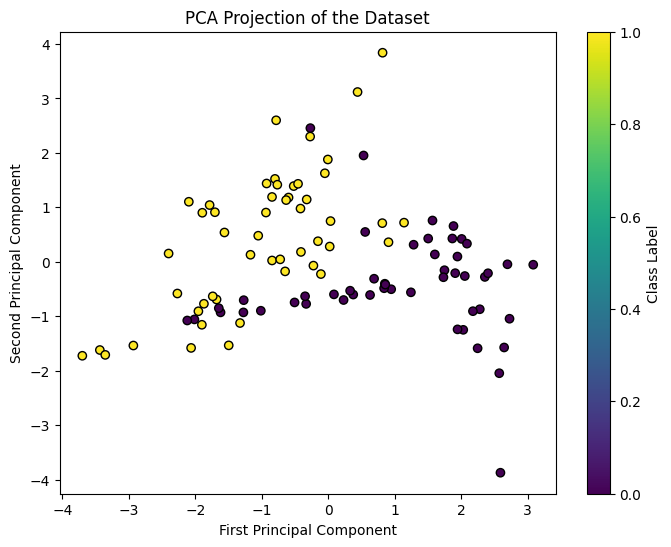

Explained variance ratio (importance of each component): [0.51568741 0.28145583]


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification

# synthetic data set
X, y = make_classification(n_samples=100, n_features=5, n_informative=3, random_state=42)

# standardize data set
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title('PCA Projection of the Dataset')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(label='Class Label')
plt.show()


print(f"Explained variance ratio (importance of each component): {pca.explained_variance_ratio_}")
